<a href="https://www.kaggle.com/code/amanmukati/bank-churn-season-4-episode-1?scriptVersionId=157898887" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paths and files 

In [2]:
sample_submission_path = "/kaggle/input/playground-series-s4e1/sample_submission.csv"
test_path = "/kaggle/input/playground-series-s4e1/test.csv"
train_path = "/kaggle/input/playground-series-s4e1/train.csv"

In [3]:
train_data = pd.read_csv(train_path)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
train_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
train_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [8]:
train_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# Visualize the distribution of the target variable 'Exited'


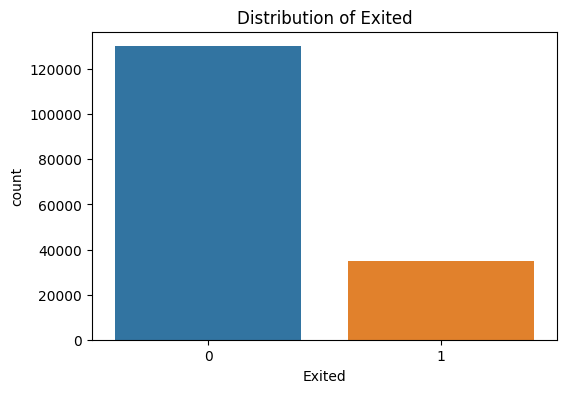

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=train_data)
plt.title('Distribution of Exited')
plt.show()

# Explore the distribution of categorical features


In [10]:
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
plt.figure(figsize=(12, 12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

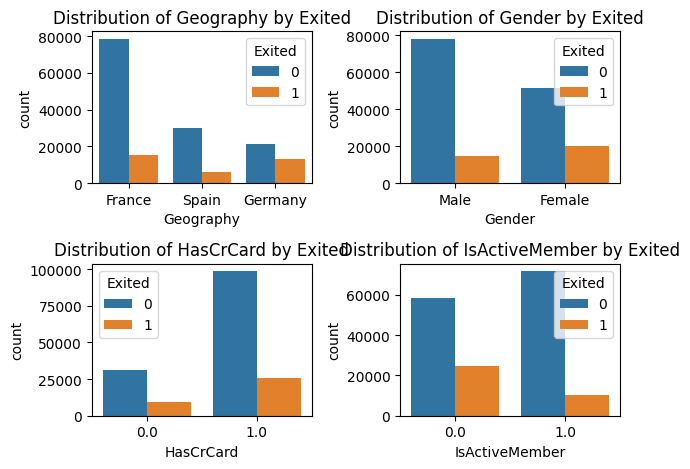

In [11]:
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='Exited', data=train_data)
    plt.title(f'Distribution of {feature} by Exited')

plt.tight_layout()
plt.show()

# Exploration of numerical features

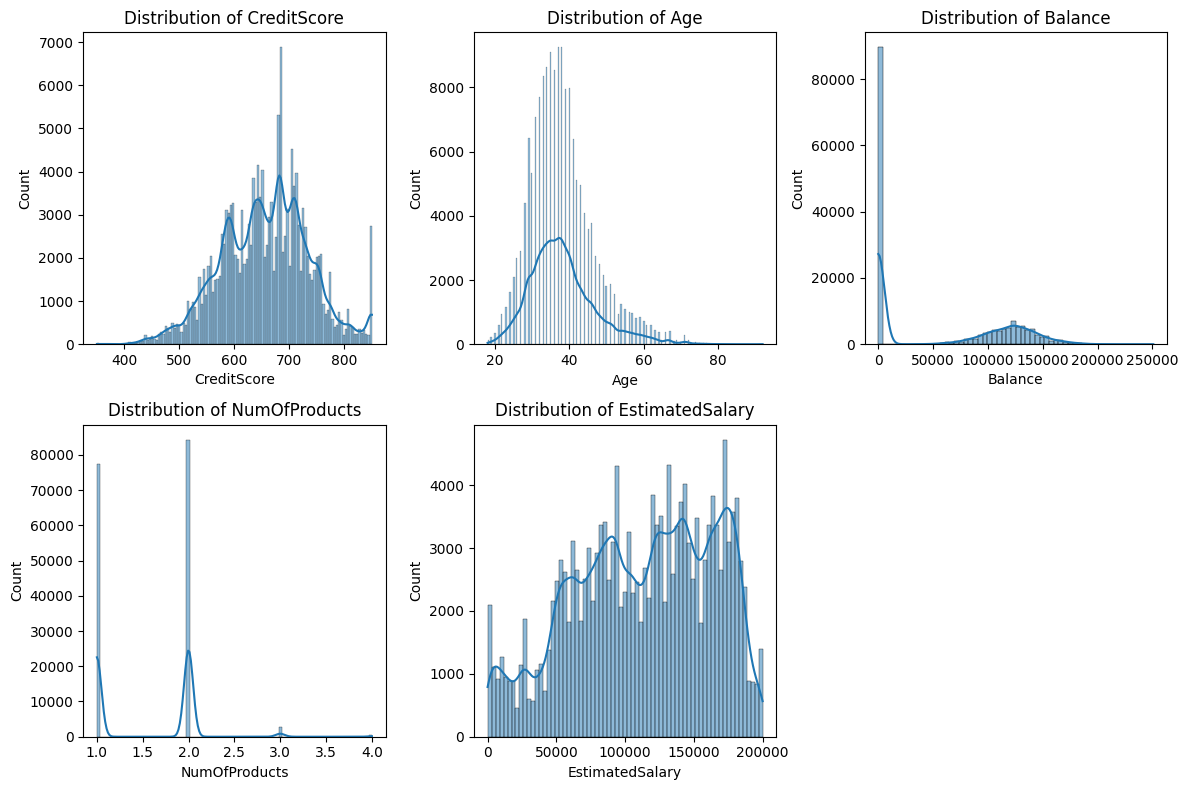

In [12]:
numerical_features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']
plt.figure(figsize=(12, 8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Correlation heatmap for numerical features


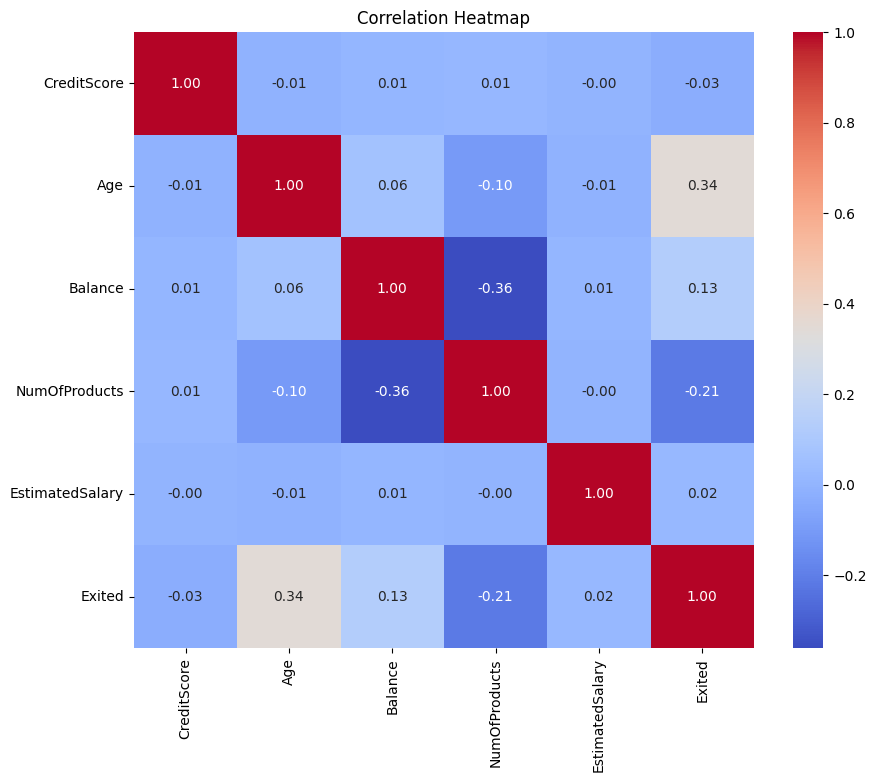

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[numerical_features + ['Exited']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
test_data = pd.read_csv(test_path)

In [15]:
test_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


# Related Libraries

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Separate features and target variable


In [17]:
X = train_data.drop(['id', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = train_data['Exited']

# Handle categorical variables (if any)


In [18]:
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])

In [19]:
label_encoder = LabelEncoder()
X['Geography'] = label_encoder.fit_transform(X['Geography'])

# Split the data into training and validation sets


In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train a logistic regression model


In [22]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

# Make predictions on validation set

In [23]:
y_val_pred = model.predict_proba(X_val_scaled)[:, 1]

# Evaluate the model


In [24]:
print("ROC-AUC Score:", roc_auc_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred > 0.5))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred > 0.5))

ROC-AUC Score: 0.8085169538156447

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90     26052
           1       0.67      0.35      0.46      6955

    accuracy                           0.83     33007
   macro avg       0.76      0.65      0.68     33007
weighted avg       0.81      0.83      0.80     33007


Confusion Matrix:
 [[24882  1170]
 [ 4540  2415]]


In [25]:
X_test = test_data.drop(['id', 'CustomerId', 'Surname'], axis=1)

In [26]:
X_test['Gender'] = label_encoder.fit_transform(X_test['Gender'])
X_test['Geography'] = label_encoder.fit_transform(X_test['Geography'])


In [27]:
X_test_scaled = scaler.transform(X_test)

In [28]:
y_test_pred = model.predict_proba(X_test_scaled)[:, 1]

submission_df = pd.DataFrame({'id': test_data['id'], 'Exited': y_test_pred})

submission_df.to_csv('submission.csv', index=False)

submission = "/kaggle/working/submission.csv"

res = pd.read_csv(submission)
res

,id,Exited
0,165034,0.023192
1,165035,0.564790
2,165036,0.153694
3,165037,0.194706
4,165038,0.290092
...,...,...
110018,275052,0.059786
110019,275053,0.175374
110020,275054,0.060453
110021,275055,0.090073


# XgBooster

In [29]:
from xgboost import XGBClassifier

In [30]:
model_xgb = XGBClassifier(random_state=42)

In [31]:
model_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [32]:
y_val_pred = model_xgb.predict_proba(X_val_scaled)[:, 1]


In [33]:
print("ROC-AUC Score:", roc_auc_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred > 0.5))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred > 0.5))

ROC-AUC Score: 0.8879019238523451

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.74      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.81      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007


Confusion Matrix:
 [[24640  1412]
 [ 3034  3921]]


# LGBM Classifier

In [34]:
from lightgbm import LGBMClassifier

In [35]:
model_lgbm = LGBMClassifier(random_state=42)

In [36]:
model_lgbm.fit(X_train_scaled, y_train)

y_val_pred = model_lgbm.predict_proba(X_val_scaled)[:, 1]

print("ROC-AUC Score:", roc_auc_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred > 0.5))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred > 0.5))

ROC-AUC Score: 0.8906846705858316

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.74      0.57      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.76      0.78     33007
weighted avg       0.86      0.87      0.86     33007


Confusion Matrix:
 [[24691  1361]
 [ 3025  3930]]


# Cat Boosting

In [37]:
from catboost import CatBoostClassifier

In [38]:
model_cat = CatBoostClassifier(random_state=42, verbose=0)
model_cat.fit(X_train_scaled, y_train)
y_val_pred = model_cat.predict_proba(X_val_scaled)[:, 1]

In [39]:
print("ROC-AUC Score:", roc_auc_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred > 0.5))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred > 0.5))

ROC-AUC Score: 0.8904092412421191

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.75      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007


Confusion Matrix:
 [[24773  1279]
 [ 3075  3880]]


In [40]:
y_test_pred = model_cat.predict_proba(X_test_scaled)[:, 1]

In [41]:
submission_df = pd.DataFrame({'id': test_data['id'], 'Exited': y_test_pred})

submission_df.to_csv('submission.csv', index=False)

submission = "/kaggle/working/submission.csv"

res = pd.read_csv(submission)
res

,id,Exited
0,165034,0.025485
1,165035,0.841584
2,165036,0.021211
3,165037,0.213375
4,165038,0.367808
...,...,...
110018,275052,0.030864
110019,275053,0.088030
110020,275054,0.020543
110021,275055,0.141732


In [42]:
from catboost import CatBoostClassifier, Pool

In [43]:
train_pool = Pool(X_train, label=y_train, cat_features=['Geography'])

In [44]:
# Use CatBoost as the algorithm
model_cats = CatBoostClassifier(
    iterations=1000,  # Increase the number of iterations
    learning_rate=0.05,  # Adjust the learning rate
    depth=8,  # Adjust the depth of the trees
    l2_leaf_reg=5,  # Adjust the L2 regularization parameter
    scale_pos_weight=1.5,  # Address class imbalance by adjusting the scale_pos_weight
    random_state=42,
    verbose=0  # Set verbose=0 to suppress CatBoost output
)


In [45]:
model_cats.fit(train_pool, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=100)

0:	learn: 0.6515156	test: 0.6514614	best: 0.6514614 (0)	total: 144ms	remaining: 2m 23s
100:	learn: 0.3632897	test: 0.3649891	best: 0.3649891 (100)	total: 11.1s	remaining: 1m 38s
200:	learn: 0.3579751	test: 0.3636757	best: 0.3636757 (200)	total: 21.5s	remaining: 1m 25s
300:	learn: 0.3528847	test: 0.3633913	best: 0.3633731 (297)	total: 32.2s	remaining: 1m 14s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3633427829
bestIteration = 338

Shrink model to first 339 iterations.


In [46]:
y_val_pred = model_cats.predict_proba(X_val)[:, 1]

In [47]:
# Evaluate the model
print("ROC-AUC Score:", roc_auc_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred > 0.5))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred > 0.5))

ROC-AUC Score: 0.8908946498972414

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     26052
           1       0.69      0.64      0.66      6955

    accuracy                           0.86     33007
   macro avg       0.80      0.78      0.79     33007
weighted avg       0.86      0.86      0.86     33007


Confusion Matrix:
 [[24022  2030]
 [ 2527  4428]]
